In [1]:
import pandas as pd 
import os 

base_dir = '/Volumes/KESU/House_Prices'
data_dir = os.path.join(base_dir, 'dataset')
dataset = pd.read_csv(os.path.join(data_dir, 'train.csv'))
dataset.shape

(1460, 81)

In [2]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_var = list(dataset.select_dtypes(include=numerics).columns)
dataset = dataset[numerical_var]
dataset.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1    ...      WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706    ...               0           61   
1          1976         0.0         978    ...             298            0   
2          2002       162.0         486    ...               0           42   
3          1970         0.0         216    ...               0           35   
4          2000       350.0         655    ...             192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(labels=['Id','SalePrice'], axis=1), dataset['SalePrice'], 
                                                                                        test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((1022, 36), (438, 36))

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

mse_values = []

for feature in X_train.columns:
    clf = DecisionTreeRegressor()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict(X_test[feature].fillna(0).to_frame())
    mse_values.append(mean_squared_error(y_test, y_scored))

In [8]:
mse_values = pd.Series(mse_values)
mse_values.index = X_train.columns
mse_values.sort_values(ascending=False)

BsmtUnfSF        9.525102e+09
LotArea          8.344802e+09
PoolArea         7.750586e+09
BsmtFinSF1       7.655977e+09
ScreenPorch      7.573486e+09
MasVnrArea       7.304582e+09
WoodDeckSF       7.291754e+09
EnclosedPorch    7.151099e+09
BsmtHalfBath     7.040329e+09
BsmtFinSF2       7.033084e+09
3SsnPorch        7.025278e+09
YrSold           7.011742e+09
2ndFlrSF         6.980334e+09
MoSold           6.947555e+09
LowQualFinSF     6.946148e+09
MiscVal          6.939146e+09
KitchenAbvGr     6.897733e+09
BedroomAbvGr     6.860463e+09
BsmtFullBath     6.644577e+09
OpenPorchSF      6.555533e+09
HalfBath         6.218652e+09
OverallCond      6.179353e+09
LotFrontage      5.926180e+09
GarageArea       5.849320e+09
Fireplaces       5.384468e+09
1stFlrSF         5.345181e+09
MSSubClass       5.272416e+09
YearRemodAdd     5.183367e+09
GrLivArea        4.788292e+09
TotRmsAbvGrd     4.780632e+09
TotalBsmtSF      4.762744e+09
GarageYrBlt      4.627072e+09
FullBath         4.575211e+09
YearBuilt 

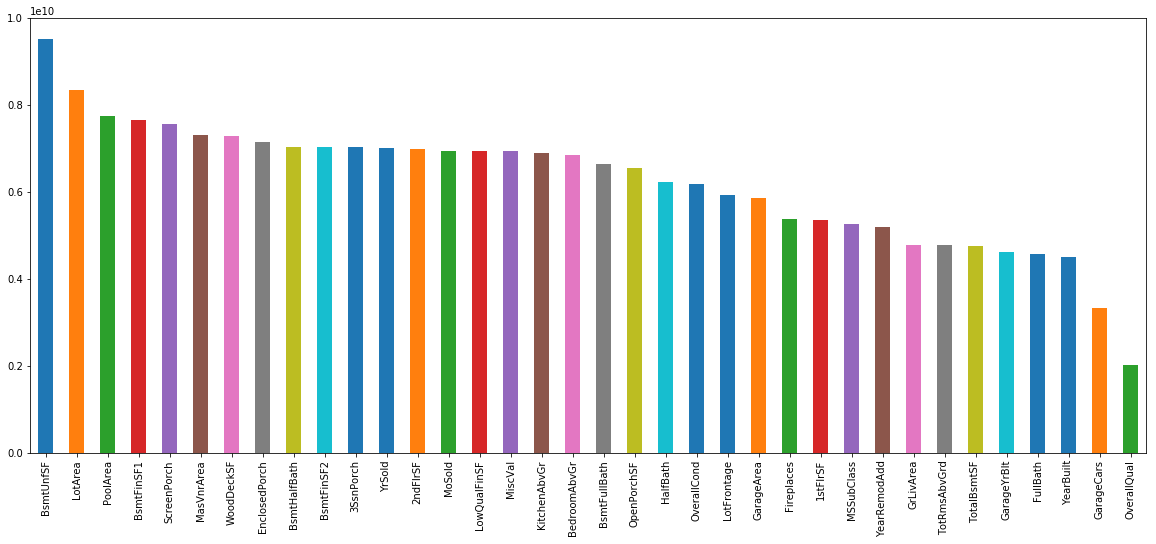

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

mse_values.sort_values(ascending=False).plot.bar(figsize=(20,8))